# Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Placement Data Set

In [2]:
data = pd.read_csv(r'Placement_Data_Full_Class.csv')

In [3]:
data.head()

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0


# Checking Null & Duplicate Values

In [4]:
data.shape    # Checking the number of rows and columns

(215, 14)

In [5]:
data.isnull().sum()  # Salary variable has 67 null values

Sno                0
Gender             0
10th %             0
SSC Board          0
12th %             0
HSC Board          0
12th Stream        0
Degree %           0
Degree stream      0
Work exp           0
specialisation     0
Mba %              0
status             0
salary            67
dtype: int64

In [6]:
 data.duplicated().sum()# We don't have any duplicated values

0

# Understanding the Data Set

In [7]:
data.dtypes   # Shows the data type of each variable

Sno                 int64
Gender             object
10th %            float64
SSC Board          object
12th %            float64
HSC Board          object
12th Stream        object
Degree %          float64
Degree stream      object
Work exp           object
specialisation     object
Mba %             float64
status             object
salary            float64
dtype: object

In [8]:
data.describe().round()  # Gives the statistical Summary of numeric Variables

,Sno,10th %,12th %,Degree %,Mba %,salary
count,215.0,215.0,215.0,215.0,215.0,148.0
mean,108.0,67.0,66.0,66.0,62.0,288655.0
std,62.0,11.0,11.0,7.0,6.0,93457.0
min,1.0,41.0,37.0,50.0,51.0,200000.0
25%,54.0,61.0,61.0,61.0,58.0,240000.0
50%,108.0,67.0,65.0,66.0,62.0,265000.0
75%,162.0,76.0,73.0,72.0,66.0,300000.0
max,215.0,89.0,98.0,91.0,78.0,940000.0


# Univariate Analysis

In [9]:
data['Gender'].value_counts()  # There are 139 Males and 76 Females 

Gender
M    139
F     76
Name: count, dtype: int64

In [10]:
data['SSC Board'].value_counts()   # Hence, 116 Students were from Central Board in 10th Class

SSC Board
Central    116
Others      99
Name: count, dtype: int64

In [12]:
data['HSC Board'].value_counts()   #Hence, Only 84 Students were from Central Board in 12th Class

HSC Board
Others     131
Central     84
Name: count, dtype: int64

In [13]:
data['12th Stream'].value_counts()  # Hence, 113 students taken Commerce as compared to 91 science and 11 Arts

12th Stream
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

In [14]:
data['Degree stream'].value_counts()  # In Degree, 145 were from Commerce & Managment, as compared to 59 Science & 11 others

Degree stream
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

In [15]:
data['Work exp'].value_counts()  # Therfore, Maximum of 141 students didn't have Experience as compared to 74 Experienced

Work exp
No     141
Yes     74
Name: count, dtype: int64

In [16]:
data['specialisation'].value_counts() # 120 students have Specialization in Marketing-finance and 95 in Marketing-HR

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [17]:
data['status'].value_counts()  # 148 students got placed as compared to 67 not placed students

status
Placed        148
Not Placed     67
Name: count, dtype: int64

# Univariate Barplot Visualization

In [18]:
def barplot(col,col1,datas,color):
    sns.barplot(x=col, y=col1, data=datas, palette=color)
    plt.show()

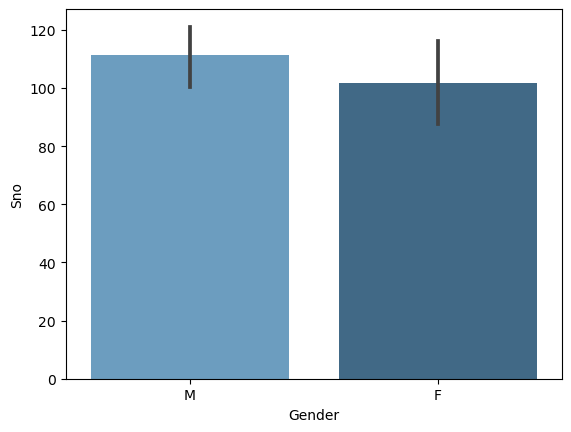

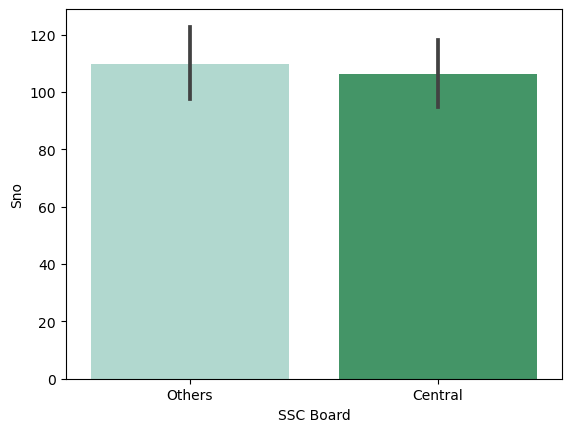

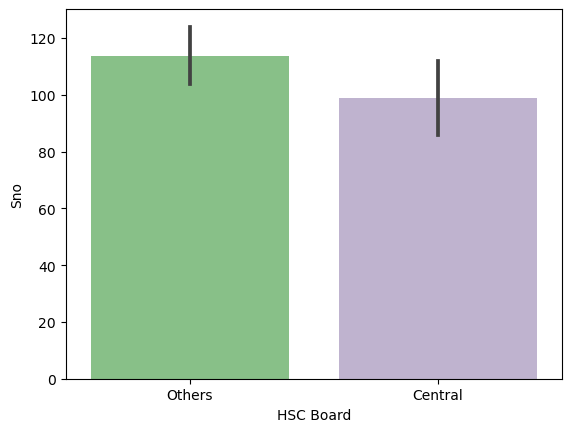

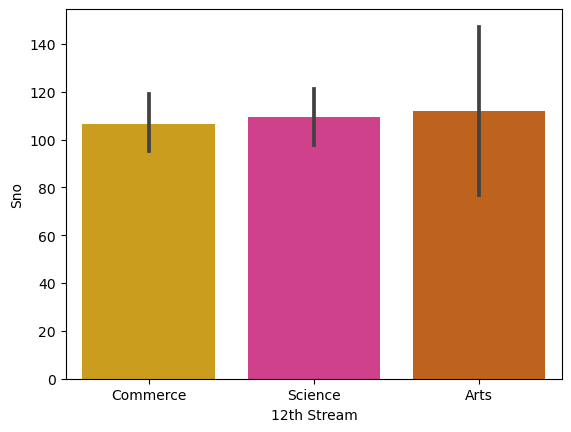

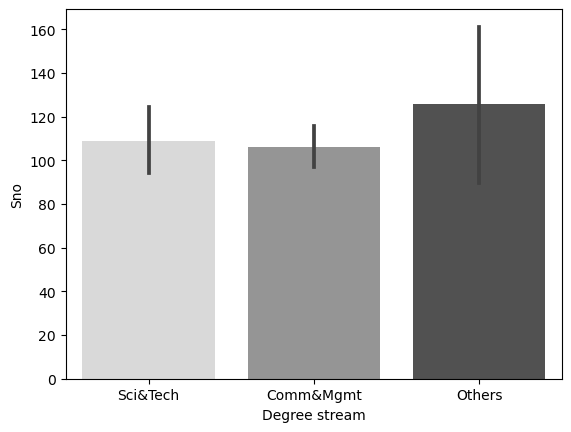

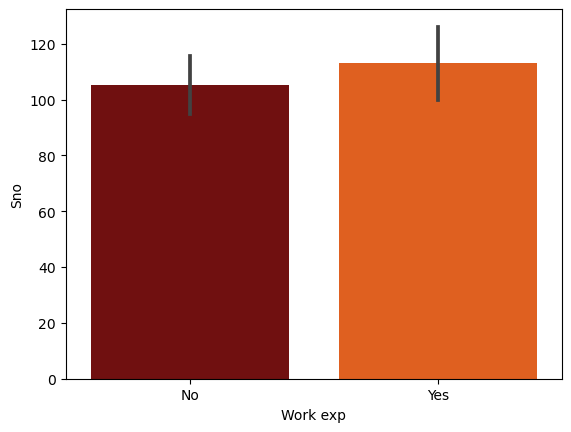

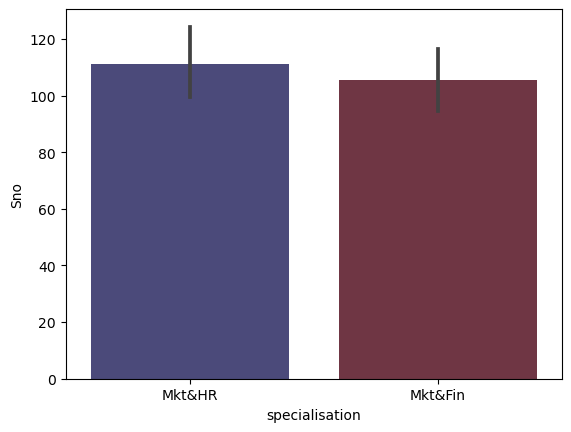

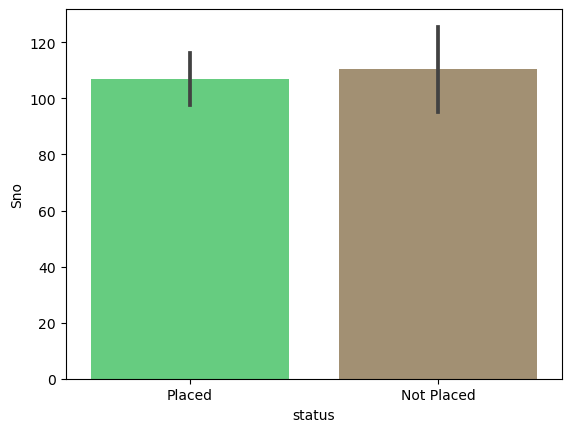

In [23]:
barplot('Gender','Sno',data, 'Blues_d')
barplot('SSC Board','Sno',data,'BuGn')
barplot('HSC Board','Sno',data,'Accent')
barplot('12th Stream','Sno',data,'Dark2_r')
barplot('Degree stream','Sno',data,'Greys')
barplot('Work exp','Sno',data,'gist_heat')
barplot('specialisation','Sno',data,'icefire')
barplot('status','Sno',data,'terrain')

# Multivariate Analysis Visualzation

In [24]:
def barplot(col,col1,datas,cr,color):
    sns.barplot(x=col,y=col1,data=datas,hue=cr,palette=color)
    plt.show()

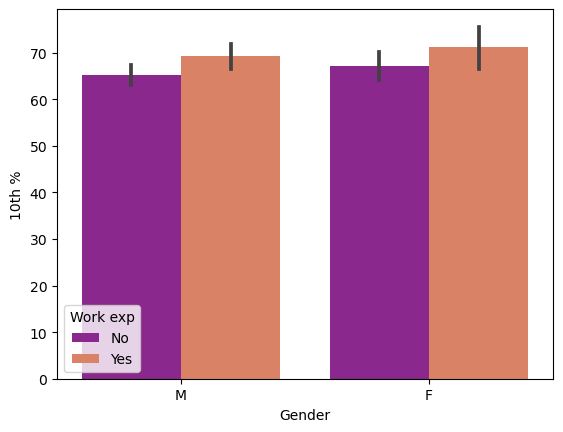

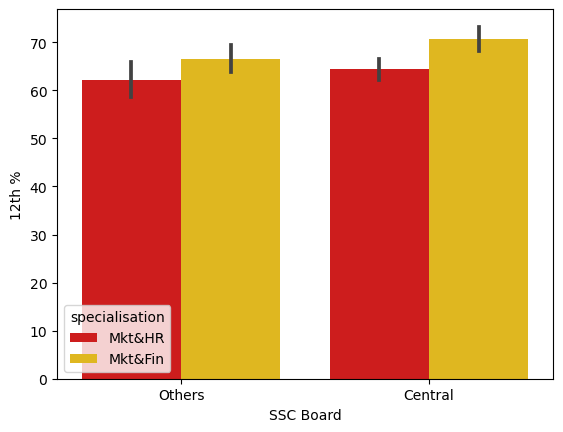

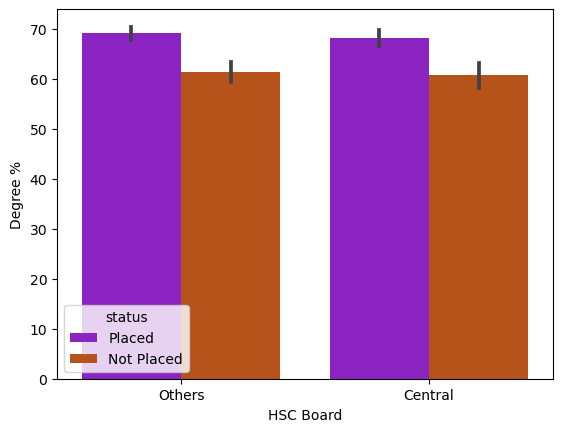

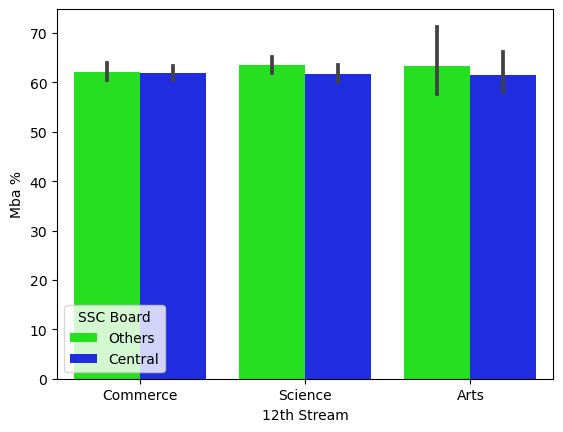

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


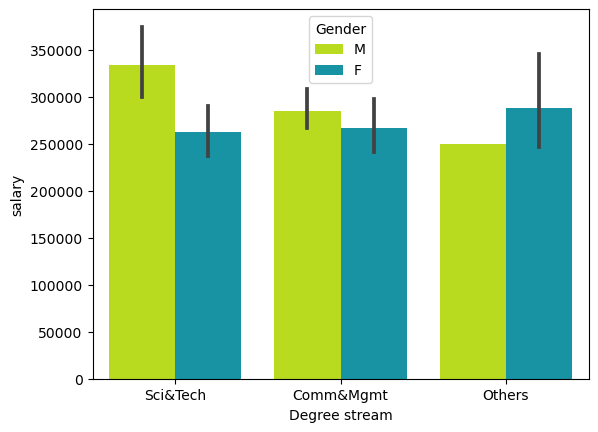

In [26]:
barplot('Gender','10th %',data,'Work exp','plasma')
barplot('SSC Board','12th %',data,'specialisation','hot')
barplot('HSC Board','Degree %',data,'status','gnuplot')
barplot('12th Stream','Mba %',data,'SSC Board','hsv')
barplot('Degree stream','salary',data,'Gender','nipy_spectral_r')

# Relationship between people who got placed and have exp and vice-versa

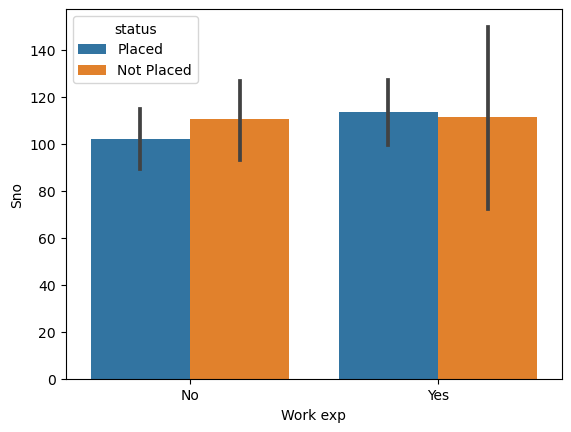

In [27]:
sns.barplot(x='Work exp', y='Sno', hue='status', data=data)
plt.show()

# Correlation Matrix Data Frame & Graph

In [30]:
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()

In [35]:
numeric_data.corr()

,Sno,10th %,12th %,Degree %,Mba %,salary
Sno,1.000000,-0.078155,-0.085711,-0.088281,0.022327,0.063764
10th %,-0.078155,1.000000,0.511472,0.538404,0.388478,0.035330
12th %,-0.085711,0.511472,1.000000,0.434206,0.354823,0.076819
Degree %,-0.088281,0.538404,0.434206,1.000000,0.402364,-0.019272
Mba %,0.022327,0.388478,0.354823,0.402364,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.175013,1.000000


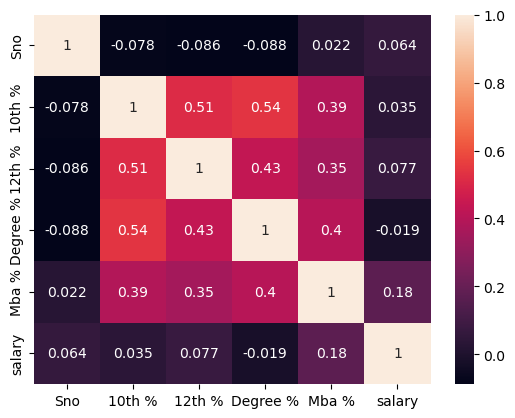

In [36]:
sns.heatmap(corr, annot=True)
plt.show()